# Problem 1:

In [14]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.polynomial as poly
import pandas as pd

In [15]:
# Create X matrix
def createX(n, degree, x, y):
    onesArr = np.ones((n, 1))
    x = x.reshape(n, 1)
    for degree in range(1, degree+1):
        if degree == 1:
            X = np.hstack((onesArr, x))
        else:
            X = np.hstack((X, x**degree))
    return X

# Calculate parameters beta
def calBeta(X, y):
    X_TX = np.matmul(np.transpose(X), X)
    X_TX_inv = np.linalg.pinv(X_TX)
    X_Ty = np.matmul(np.transpose(X), y)
    beta = np.matmul(X_TX_inv, X_Ty)
    return beta

In [38]:
# Initialize f(x)
f_x = np.zeros((1))
f_x = np.delete(f_x, 0, axis=0)
numOfSamples = 51

# Generate x values
x = np.linspace(0, 1 , numOfSamples)

# Compute f(x)
for xval in x:
    f_temp = 1 + 2*sin(5*xval) - sin(15*xval)
    f_x = np.hstack((f_x, f_temp))
    
# Generate gaussian distribution with mean=0 and var=1
e = np.random.normal(0, 1, numOfSamples)

# Generate y values for the x values
y = f_x + e

# Generate X matrix
X = createX(numOfSamples, 11, x, y)

# Estimate the coefficients
beta = calBeta(X, y)

# Find predicted values of y based on estimated coefficients beta
y_pred = np.matmul(X, beta)

# prediction with numpy function
# coefs = poly.polyfit(x, y, 11)
# ffit = poly.polyval(x, coefs)
# plt.plot(x, ffit, 'g')

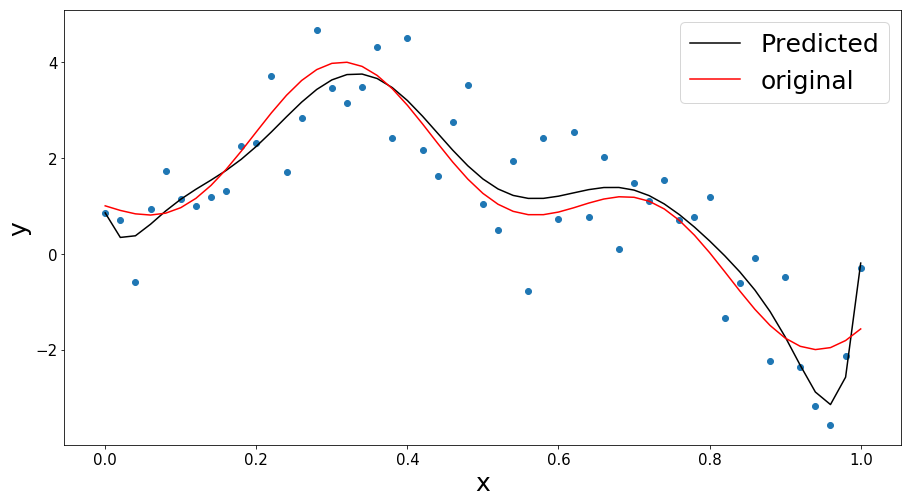

In [46]:
# Plots
fig, ax = plt.subplots(figsize=(15, 8))
params = {'legend.fontsize': 25}
plt.rcParams.update(params)
# Plot original data
plt.scatter(x, y)
# plot predicted data from polynomial regression
plt.plot(x, y_pred, 'black', label='Predicted')
# Plot function f(x)
plt.plot(x, f_x, 'red', label='original')
# plot labels
plt.xlabel('x', size=25)
plt.ylabel('y', size=25)

plt.legend(loc="best")

# Define ticks
# ax.xaxis.set_major_locator(plt.MultipleLocator(1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

# increse font size of ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Problem 3

In [47]:
spamBaseData = pd.read_csv("spambase/spambase.data", header=None)
# spamBaseData.head()

In [48]:
dataShape = spamBaseData.shape
# spamBaseData = spamBaseData.to_numpy()
# dataShape = np.shape(spamBaseData)
print(dataShape)

(4601, 58)


In [74]:
# Extract attributes X from the data
X = spamBaseData.iloc[:, 0:dataShape[1]-1]
# print(np.shape(X))
# Extract output y from the data
y = spamBaseData.iloc[:, -1]
# print(np.shape(y))
# filter spam
spamEmails = spamBaseData.loc[y == 1]
# filtet not spam
notSpamEmails = spamBaseData.loc[y == 0]
X = X.to_numpy()
y = y.to_numpy()
spamEmailsArr = spamEmails.to_numpy()
notSpamEmailsArr = notSpamEmails.to_numpy()
print(np.floor((2/3)*np.shape(spamEmails)[0]))
print(np.shape(notSpamEmails))

1208.0
(2788, 58)


In [75]:
print(spamEmailsArr)

[[0.000e+00 6.400e-01 6.400e-01 ... 6.100e+01 2.780e+02 1.000e+00]
 [2.100e-01 2.800e-01 5.000e-01 ... 1.010e+02 1.028e+03 1.000e+00]
 [6.000e-02 0.000e+00 7.100e-01 ... 4.850e+02 2.259e+03 1.000e+00]
 ...
 [0.000e+00 0.000e+00 7.700e-01 ... 6.200e+01 2.580e+02 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 6.600e+01 1.010e+02 1.000e+00]
 [0.000e+00 3.100e-01 4.200e-01 ... 3.180e+02 1.003e+03 1.000e+00]]


In [77]:
totalSpam = spamEmails.shape[0]
totalNotSpam = notSpamEmails.shape[0]
numSpamTrain = int(np.floor((2/3)*np.shape(spamEmails)[0]))
numNotSpamTrain = int(np.floor((2/3)*np.shape(notSpamEmails)[0]))
# print(numSpamTrain)
print(numNotSpamTrain)
numSpamTest = totalSpam - numSpamTrain
numNotSpamTest = totalSpam - numNotSpamTrain
# print(numSpamTest)
XtrainSpam = spamEmailsArr[0: numSpamTrain, :]
XtrainNotSpam = notSpamEmailsArr[0: numNotSpamTrain, :]
print(np.shape(XtrainNotSpam))

XtestSpam = spamEmailsArr[numSpamTrain:numSpamTrain+numSpamTest, :]
XtestNotSpam = notSpamEmailsArr[numNotSpamTrain:numNotSpamTrain+numNotSpamTest, :]
print(np.shape(XtestNotSpam))
# print(np.shape(XtestSpam))

1858
(1858, 58)
(0, 58)


In [ ]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
# Computes weighted sum of inputs
def calWeightedSum(theta, x):
    return np.dot(x, theta)

# Computes the cost function for all the training samples
def calCost(theta, x, y):
    m = x.shape[0]
    hx = sigmoid(calWeightedSum(theta, x))
    cost = -(1 / m) * np.sum(y * np.log(hx) + (1 - y) * np.log(1 - hx))
    return cost

# Computes the gradient of the cost function at the point theta
def calGradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(np.transpose(x), sigmoid(net_input(theta, x)) - y)

def updateWeights(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [77]:
start_time = time.time()

num_iter = 100000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = calGradient(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

(4601, 57)
